<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,U,NaN,A,4.0,4.0,at_home,teacher,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,U,GT3,NaN,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,NaN,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18.0,U,GT3,T,1.0,1.0,other,other,...,yes,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


2.0     129
3.0      95
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

There are 15 columns in stud_new dataset with missing values.


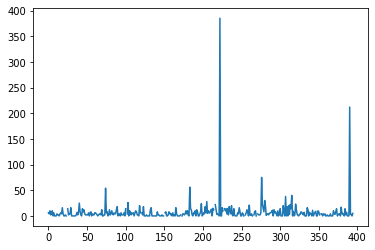

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stud = pd.read_csv('stud_math.xls')
stud.info()
del stud['studytime, granular'] #увидела лишний столбец - удаляю
print(f'There are {stud.isnull().any().sum()} columns in stud dataset with missing values.')
#проверяю сколько столбцов имеют пустые значения

plt.plot(stud['absences']) 
stud = stud.drop(np.where(stud['absences'] == 212)[0])
stud = stud.drop(np.where(stud['absences'] == 385)[0]) 
'''выбросы в столбце absences (честно говоря, я это 
увидела когда выводила значения для всех столбцов), поэтому здесь немного не к месту 
смотрится, но решила удалить строки тут '''

def replace_missing_values(df): #фунцкия замены nan на медиану
    numerics = ['int64', 'float64'] 
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            median = df[col].median()
            df.loc[df[col].isnull(), col] = median
    return df

stud_new = replace_missing_values(stud) #создаю новый датафрейм
display(stud_new)
display(stud_new['Fedu'].value_counts(dropna=False))
print(f'There are {stud_new.isnull().any().sum()} columns in stud_new dataset with missing values.')
#проверяю сработал ли он на выборочном столбце Fedu и изменилось ли кол-во пустых столбцов

In [2]:
numerics = ['int64', 'float64'] 
for col in stud_new.columns:
    col_type = stud_new[col].dtypes
    if col_type in numerics:
        print(stud_new[col].value_counts(dropna=False), '\n') 
#проверяю значения в каждом числовом столбце 

stud_new.loc[stud_new.Fedu == 40, 'Fedu'] = 4.0
stud_new.loc[stud_new.famrel == -1.0, 'famrel'] = 1.0
#исправляю опечатки

16.0    103
17.0     98
15.0     82
18.0     82
19.0     24
20.0      2
21.0      1
22.0      1
Name: age, dtype: int64 

4.0    131
2.0    100
3.0    100
1.0     59
0.0      3
Name: Medu, dtype: int64 

2.0     129
3.0      95
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64 

1.0    268
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64 

2.0    199
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64 

0.0    314
1.0     49
2.0     15
3.0     15
Name: failures, dtype: int64 

 4.0    209
 5.0     98
 3.0     62
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64 

3.0    163
4.0    112
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64 

3.0    135
2.0    101
4.0     83
5.0     52
1.0     22
Name: goout, dtype: int64 

5.0    138
3.0     88
4.0     77
1.0     47
2.0     43
Name: health, dtype: int64 

0.0     111
4.0      65
2.0      60
6.0      31
8.0      21
10.0     17
14.0     12
12.0     12
3.0       8
16.0   

In [3]:
objects = ['object'] 
for col in stud_new.columns:
    col_type = stud_new[col].dtypes
    if col_type in objects:
        print(stud_new[col].value_counts(dropna=False), '\n') 
        
#stud_new['address'].value_counts(dropna=False, normalize=True).head()
#display(stud_new[['school', 'traveltime']][stud_new.address == 'U'].value_counts())
#display(stud_new[['school', 'traveltime']][stud_new.address == 'R'].value_counts())
'''тут была идея заменить nan на какие-то конкретные значения, например, поставить адрес в зависимости
от школы и времени пути в школу, но что-то пошло не так :')
поэтому решила удалить все строки где фигурирует nan, но до этого удалить столбцы с номинативными 
переменными, не влияющими на предказываемую величину'''

#удаляю "ненужные" (imho) столбцы, думаю надо удалять те, где значения разделились примерно поровну
#хранить дальше не имеет смысла, тк это нам ничего не скажет о корреляции между параметром и предсказанием
#del stud_new['reason']
#del stud_new['activities']
'''удалилось довольно много строк, кажется это было не совсем верным решением...'''

stud_new = stud_new.dropna()
stud_new.info()


GP    348
MS     45
Name: school, dtype: int64 

F    207
M    186
Name: sex, dtype: int64 

U      293
R       83
NaN     17
Name: address, dtype: int64 

GT3    260
LE3    106
NaN     27
Name: famsize, dtype: int64 

T      313
NaN     45
A       35
Name: Pstatus, dtype: int64 

other       133
services     96
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64 

other       197
services    101
NaN          36
teacher      28
at_home      16
health       15
Name: Fjob, dtype: int64 

course        136
home          104
reputation    103
other          33
NaN            17
Name: reason, dtype: int64 

mother    249
father     86
NaN        30
other      28
Name: guardian, dtype: int64 

no     334
yes     50
NaN      9
Name: schoolsup, dtype: int64 

yes    218
no     137
NaN     38
Name: famsup, dtype: int64 

no     199
yes    154
NaN     40
Name: paid, dtype: int64 

yes    195
no     184
NaN     14
Name: activities, dtype: int64 

yes    298
no

In [38]:
stud_new.loc[stud_new.school == 'GP', 'school'] = 1
stud_new.loc[stud_new.school == 'MS', 'school'] = 2

stud_new.loc[stud_new.sex == 'F', 'sex'] = 1.0
stud_new.loc[stud_new.sex == 'M', 'sex'] = 2.0

stud_new.loc[stud_new.address == 'U', 'address'] = 1.0
stud_new.loc[stud_new.address == 'R', 'address'] = 2.0

stud_new.loc[stud_new.famsize == 'GT3', 'famsize'] = 1.0
stud_new.loc[stud_new.famsize == 'LE3', 'famsize'] = 2.0

stud_new.loc[stud_new.Pstatus == 'T', 'Pstatus'] = 1.0
stud_new.loc[stud_new.Pstatus == 'A', 'Pstatus'] = 2.0

stud_new.loc[stud_new.Mjob == 'other', 'Mjob'] = 1
stud_new.loc[stud_new.Mjob == 'services', 'Mjob'] = 2
stud_new.loc[stud_new.Mjob == 'at_home', 'Mjob'] = 3
stud_new.loc[stud_new.Mjob == 'teacher', 'Mjob'] = 4
stud_new.loc[stud_new.Mjob == 'health', 'Mjob'] = 5

stud_new.loc[stud_new.Fjob == 'other', 'Fjob'] = 1
stud_new.loc[stud_new.Fjob == 'services', 'Fjob'] = 2
stud_new.loc[stud_new.Fjob == 'at_home', 'Fjob'] = 3
stud_new.loc[stud_new.Fjob == 'teacher', 'Fjob'] = 4
stud_new.loc[stud_new.Fjob == 'health', 'Fjob'] = 5

stud_new.loc[stud_new.reason == 'course', 'reason'] = 1
stud_new.loc[stud_new.reason == 'home', 'reason'] = 2
stud_new.loc[stud_new.reason == 'reputation', 'reason'] = 3
stud_new.loc[stud_new.reason == 'other', 'reason'] = 4

stud_new.loc[stud_new.guardian == 'mother', 'guardian'] = 1
stud_new.loc[stud_new.guardian == 'father', 'guardian'] = 2
stud_new.loc[stud_new.guardian == 'other', 'guardian'] = 3

stud_new.loc[stud_new.schoolsup == 'yes', 'schoolsup'] = 1
stud_new.loc[stud_new.schoolsup == 'no', 'schoolsup'] = 0

stud_new.loc[stud_new.famsup == 'yes', 'famsup'] = 1
stud_new.loc[stud_new.famsup == 'no', 'famsup'] = 0

stud_new.loc[stud_new.paid == 'yes', 'paid'] = 1
stud_new.loc[stud_new.paid == 'no', 'paid'] = 0

stud_new.loc[stud_new.activities == 'yes', 'activities'] = 1
stud_new.loc[stud_new.activities == 'no', 'activities'] = 0

stud_new.loc[stud_new.higher == 'yes', 'higher'] = 1
stud_new.loc[stud_new.higher == 'no', 'higher'] = 0

stud_new.loc[stud_new.nursery == 'yes', 'nursery'] = 1
stud_new.loc[stud_new.nursery == 'no', 'nursery'] = 0

stud_new.loc[stud_new.higher == 'yes', 'higher'] = 1
stud_new.loc[stud_new.higher == 'no', 'higher'] = 0

stud_new.loc[stud_new.internet == 'yes', 'internet'] = 1
stud_new.loc[stud_new.internet == 'no', 'internet'] = 0

stud_new.loc[stud_new.romantic == 'yes', 'romantic'] = 1
stud_new.loc[stud_new.romantic == 'no', 'romantic'] = 0

#заменила все на числа, чтобы рисовать графики... тоже кажется не очень разумным

stud_new[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
    'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
    'internet', 'romantic']] = stud_new[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
    'internet', 'romantic']].apply(pd.to_numeric)

In [28]:
stud_new.info() #проверяю всё ли теперь numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 4 to 391
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      135 non-null    int64  
 1   sex         135 non-null    float64
 2   age         135 non-null    float64
 3   address     135 non-null    float64
 4   famsize     135 non-null    float64
 5   Pstatus     135 non-null    float64
 6   Medu        135 non-null    float64
 7   Fedu        135 non-null    float64
 8   Mjob        135 non-null    int64  
 9   Fjob        135 non-null    int64  
 10  reason      135 non-null    int64  
 11  guardian    135 non-null    int64  
 12  traveltime  135 non-null    float64
 13  studytime   135 non-null    float64
 14  failures    135 non-null    float64
 15  schoolsup   135 non-null    int64  
 16  famsup      135 non-null    int64  
 17  paid        135 non-null    int64  
 18  activities  135 non-null    int64  
 19  nursery     135 non-null    i

In [31]:
corr_matrix = stud_new.corr().abs()

In [36]:
corr_matrix['score'] 

school        0.082247
sex           0.217052
age           0.192673
address       0.262269
famsize       0.071224
Pstatus       0.036130
Medu          0.170377
Fedu          0.002986
Mjob          0.024412
Fjob          0.035717
reason        0.127964
guardian      0.002564
traveltime    0.095843
studytime     0.094681
failures      0.348679
schoolsup     0.160378
famsup        0.035585
paid          0.074312
activities    0.002748
nursery       0.017487
higher        0.088182
internet      0.145203
romantic      0.190229
famrel        0.003809
freetime      0.133757
goout         0.145017
health        0.177651
absences      0.018062
score         1.000000
Name: score, dtype: float64

<p style="font-family: Arial; font-size:1.6em;color:black;"> Вывод </p>

In [ ]:
Данные представленные в таблице не дают возможности предсказывать величину параметра score
Так как корреляция со всеми параметрами очень слабая